#**Desafío 12 - Clasificación desde el Machine Learning**

##*Francisca Pinto*

### 09 de septiembre de 2021

Se inicia con la importación de las bibliotecas y métodos necesarios

In [ ]:
import pandas as pd
import numpy as np

#estadística

import scipy.stats as stats

#gráficos

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#análisis normalidad

import statsmodels.api as sm
import statsmodels.formula.api as smf

#regresión lineal

from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

#regresión logística

from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import LeaveOneOut
from sklearn.preprocessing import PolynomialFeatures

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
plt.style.use("seaborn") #tipo de gráfico, estilo
plt.rcParams["figure.figsize"] = (4,4) #escalar gráficos
plt.rcParams["figure.dpi"] = 100 #DPI gráficos

##Descripción

En esta sesión trabajaremos con una base de datos sobre clientes morosos de un banco.

Dentro de ésta se registran las siguientes observaciones:

- default:​ Variable binaria. Registra si el cliente entró en morosidad o no.
- income:​ Ingreso promedio declarado por el cliente.
- balance:​ Total de saldo en la cuenta de crédito.
- student:​ Variable binaria. Registra si el cliente es estudiante o no.

##Desafío 1: Preparación del ambiente de trabajo

1. Importe los módulos básicos para el análisis de datos
2. Importe ​seaborn​.
3. Importe ​statsmodels​.
3. Importe ​LogisticRegression​, ​train_test_split​, ​StandardScaler​, classification_report​ y ​roc_curve​ de ​sklearn​.

Los puntos anteriores ya se encuentran dentro del import de la primera celda. Ahora importaremos el DataFrame.

In [ ]:
path_colab = "/content/default_credit.csv"
df = pd.read_csv(path_colab)
df.drop(columns = "index", inplace = True)
df

,default,student,balance,income
0,No,No,729.526495,44361.625074
1,No,Yes,817.180407,12106.134700
2,No,No,1073.549164,31767.138947
3,No,No,529.250605,35704.493935
4,No,No,785.655883,38463.495879
...,...,...,...,...
9995,No,No,711.555020,52992.378914
9996,No,No,757.962918,19660.721768
9997,No,No,845.411989,58636.156984
9998,No,No,1569.009053,36669.112365


In [ ]:
df.columns

Index(['default', 'student', 'balance', 'income'], dtype='object')

##Desafío 2: Análisis exploratorio

Explore las principales relaciones entre las variables. Utilizando los métodos boxplot​ y ​lmplot​ de ​seaborn​ implemente los siguientes gráficos:
1. Un boxplot del balance total de las cuentas, segmentado por el status de
estudiante.
2. Un boxplot del ingreso total de cada cliente, segmentado por el status de
estudiante.
3. Un boxplot del balance total de las cuentas, segmentado por el status de
default.
4. Un boxplot del ingreso total de cada cliente, segmentado por el status de
default.
5. Un diagrama de dispersión entre balance e income, segmentado por el status
de estudiante.
6. Un diagrama de dispersión entre balance e income, segmentado por el status
de default.
7. Comente brevemente sobre los principales patrones de comportamiento.

>tip: Puede utilizar el argumento ​hue en ​lmplot para identificar las observaciones por status.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Boxplot de Balance según estatus de Student')

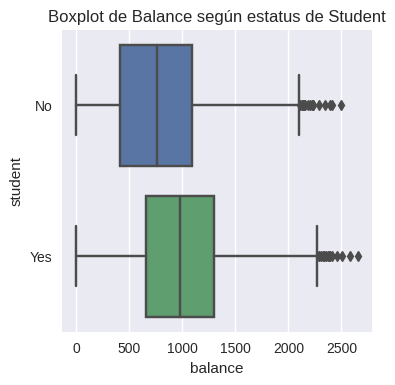

In [ ]:
sns.boxplot(df["balance"], y = df["student"])
plt.title("Boxplot de Balance según estatus de Student")

Respecto a cada gráfico o grupo de gráficos:
1. Boxplot de Balance según estatus de Student: la media de Balance es mayor en el caso de los clientes que son estudiantes. La distribución de las cajas y las colas es similar (la distribución de valores tiene una extensión parecida). Se observa presencia de valores outlier en ambos casos.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Boxplot de Income según estatus de Student')

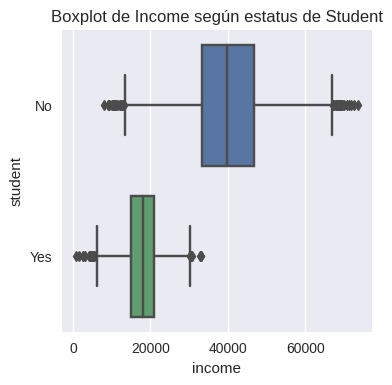

In [ ]:
sns.boxplot(df["income"], y = df["student"])
plt.title("Boxplot de Income según estatus de Student")

2. Boxplot de Income según estatus de Student: Los ingresos son sensiblemente mayores en el caso de los clientes que no son estudiantes. La distribución de los ingresos de los clientes que son estudiantes presenta una mayor concentración, la franja de valores es más acotada. Los valores outlier en esa misma clasificación (sobretodo hacia el costado derecho del eje X) son menos que en el caso de clientes no estudiantes.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Boxplot de Balance según estado de Default')

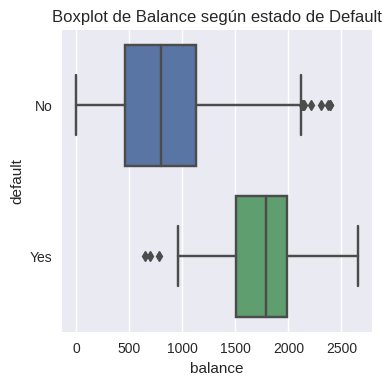

In [ ]:
sns.boxplot(df["balance"], y = df["default"])
plt.title("Boxplot de Balance según estado de Default")

3. Boxplot de Balance según estatus de Default: Los clientes que entran en morosidad tienen en promedio mayores balances en su cuenta que los que no. Se observa que el rango de posibles balances de las personas que no han caído en morosidad es más amplio.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Boxplot de Income según estado de Default')

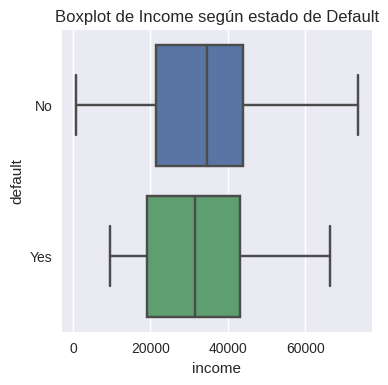

In [ ]:
sns.boxplot(df["income"], y = df["default"])
plt.title("Boxplot de Income según estado de Default")

4. Boxplot de Income según estatus de Default: Las distribuciones son similares, no existen diferencias importantes en relación al nivel de ingresos, entre las personas que han caído en morosidad y las que no. La diferencia más notoria es el rango de posibles valores, que es más acotado en el caso de las personas que han caído en morosidad.

Text(0.5, 1.0, 'Lmplot entre Balance e Income, separado por estatus de Student')

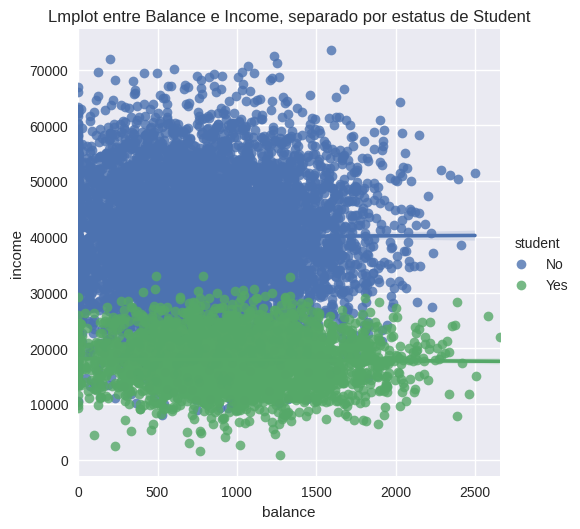

In [ ]:
sns.lmplot(x = "balance", y = "income", hue = "student", data = df)
plt.title("Lmplot entre Balance e Income, separado por estatus de Student")

5. Gráfico de Balance e Income, según estatus de Student: las líneas de tendencia son prácticamente horizontales: no existe relación entre las variables (de tipo lineal), income permanece constante sin importar los cambios que sufra balance, en ambos casos.

Text(0.5, 1.0, 'Lmplot entre Balance e Income, separado por estatus de Default')

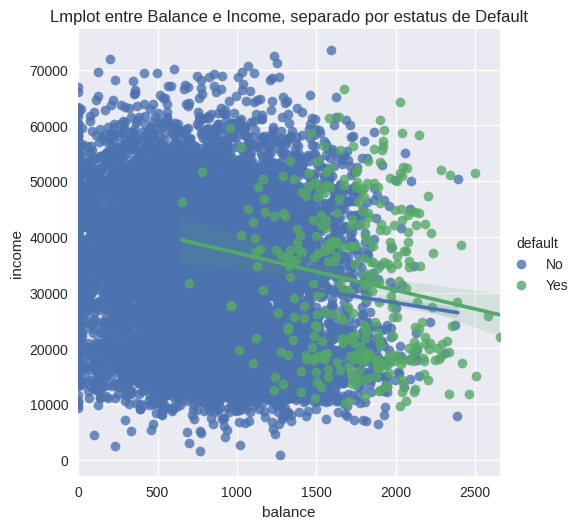

In [ ]:
sns.lmplot(x = "balance", y = "income", hue = "default", data = df)
plt.title("Lmplot entre Balance e Income, separado por estatus de Default")

6. Lmplot entre Balance e Income, según estatus de Default: El gráfico nos permite ver que la cantidad de personas que han caído en morosidad es mucho menor a la que sí ha estado en tal condición, lo que significa un importante desbalanceo entre las clases en este caso.

A diferencia del caso anterior, en este sí se observa una correlación entre las variables, dada la modificación del filtro del gráfico: cuando se considera la morosidad existen relaciones inversamente proporcionales entre los balances e ingresos de los clientes. De todos modos la correlación es débil (por las pendientes de las rectas), y en el caso de la recta de clientes que han caído en morosidad se observa un rango amplio de error en torno a ella.

##Desafío 3: Modelación econométrica

1. Recodifique las variables ​student y ​default para que adquieran atributos
numéricos.
2. Implemente el siguiente modelo econométrico:

log(1−PPr(rd(defeafu al utl=t=1) 1)) = β0 + β1 · balance + β2 · income + β3 · student

3. A partir de este modelo, depúrelo y mantenga las principales características. Ejecute de nuevo el modelo y comente brevemente sobre el comportamiento de los atributos.

In [ ]:
df["student_bin"] = np.where(df["student"] == "Yes", 1, 0)
df["default_bin"] = np.where(df["default"] == "Yes", 1, 0)

df_binarized = df.drop(columns = ["default", "student"]).dropna()
df_binarized

,balance,income,student_bin,default_bin
0,729.526495,44361.625074,0,0
1,817.180407,12106.134700,1,0
2,1073.549164,31767.138947,0,0
3,529.250605,35704.493935,0,0
4,785.655883,38463.495879,0,0
...,...,...,...,...
9995,711.555020,52992.378914,0,0
9996,757.962918,19660.721768,0,0
9997,845.411989,58636.156984,0,0
9998,1569.009053,36669.112365,0,0


Comentarios:

1. No se observan valores nulos (dimensión de la matriz a nivel de filas no se altera luego de aplicar sobre el nuevo DataFrame el método .dropna()).
2. Se continúa creando modelo logit sin variables polinomiales ni relaciones entre ellas (orden 1).

In [ ]:
model1 = smf.logit("default_bin ~ income + balance + student_bin", data = df_binarized).fit()
model1.summary()

Optimization terminated successfully.
         Current function value: 0.078577
         Iterations 10


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:            default_bin   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9996
Method:                           MLE   Df Model:                            3
Date:                Thu, 09 Sep 2021   Pseudo R-squ.:                  0.4619
Time:                        21:52:20   Log-Likelihood:                -785.77
converged:                       True   LL-Null:                       -1460.3
Covariance Type:            nonrobust   LLR p-value:                3.257e-292
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept     -10.8690      0.492    -22.079      0.000     -11.834      -9.904
income       3.033e-06    8.2e-06      0.370      0.712    -1.3e-05    1.91e-05
balance         0.0057      0.000     24.737      0.000       0.005       0.006
student_bin    -0.6468      0.236     -2.738      0.006      -1.110      -0.184
===============================================================================

Possibly complete quasi-separation: A fraction 0.15 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

Luego de observar los puntajes Z y considerando un intervalo de confianza de un 95% (corte de 1.96), las variables a considerar en el modelo siguiente serán:

1. Income
2. Student_bin

In [ ]:
df_binarized2 = df_binarized.drop(columns = ["balance"])
df_binarized2

,income,student_bin,default_bin
0,44361.625074,0,0
1,12106.134700,1,0
2,31767.138947,0,0
3,35704.493935,0,0
4,38463.495879,0,0
...,...,...,...
9995,52992.378914,0,0
9996,19660.721768,0,0
9997,58636.156984,0,0
9998,36669.112365,0,0


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df_binarized2.loc[:, "income" : "student_bin"],
                                                    df_binarized2["default_bin"],
                                                    test_size = 0.33,
                                                    random_state = 265)

X_train_std = StandardScaler().fit_transform(X_train)
X_test_std = StandardScaler().fit_transform(X_test)

model1 = LogisticRegression().fit(X_train_std, y_train)

model1.coef_

array([[0.13177835, 0.3071096 ]])

Se aplica método .predict() para conocer el vector predicho.


In [ ]:
yhat = model1.predict(X_test_std)
yhat

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
yhat_proba = model1.predict_proba(X_test_std)
yhat_proba

array([[0.97465506, 0.02534494],
       [0.96983399, 0.03016601],
       [0.9597704 , 0.0402296 ],
       ...,
       [0.97068607, 0.02931393],
       [0.96697208, 0.03302792],
       [0.95598068, 0.04401932]])

Se calculan las métricas de desempeño para el modelo:

In [ ]:
m1_accuracy = accuracy_score(y_test, yhat)
m1_precision = precision_score(y_test, yhat)
m1_recall = recall_score(y_test, yhat)
m1_f1 = f1_score(y_test, yhat)

print("Accuracy:", m1_accuracy, "\n", "Precision: ", m1_precision, "\n", "Recall: ", m1_recall, "\n", "f1-score: ", m1_f1)

Accuracy: 0.963030303030303 
 Precision:  0.0 
 Recall:  0.0 
 f1-score:  0.0


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
